In [ ]:
# Step 1: Uninstall problematic packages
!pip uninstall tensorflow protobuf pyodbc -y

# Step 2: Install compatible versions of tensorflow and protobuf
!pip install tensorflow==2.15.0 protobuf==3.20.3

# Step 3: Install other required packages
!pip install flask numpy

# Step 4: Update pandas dependencies (numexpr and bottleneck)
!pip install numexpr==2.8.4 bottleneck==1.3.6

# Step 5: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Verify TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")

# Data Collection
# Note: Dataset is organized in 'dataset/train' and 'dataset/test' with subfolders like healthy/, inflected/, etc.
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
uploads_dir = 'uploads'

# Create directories if they don't exist
for dir_path in [train_dir, test_dir, uploads_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Model Building
## Loading the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

## Freeze the hidden layers
base_model.trainable = False

## Get the output of the base model
vgg_output = base_model.output

## Adding Flatten Layers
x = Flatten()(vgg_output)

## Adding Output Layer (19 classes for nail diseases, updated to match dataset)
predictions = Dense(19, activation='softmax')(x)  # Changed to 19 to match the dataset

## Creating a Model object
model = Model(inputs=base_model.input, outputs=predictions)

# View the structure of the model
model.summary()

# Configure the Learning Process
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation with ImageDataGenerator
## Configure ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0,1]
    rotation_range=20,        # Rotate images up to 20 degrees
    width_shift_range=0.2,    # Shift width by up to 20%
    height_shift_range=0.2,   # Shift height by up to 20%
    horizontal_flip=True,     # Allow horizontal flipping
    brightness_range=[0.8, 1.2],  # Adjust brightness between 80% and 120%
    zoom_range=0.2            # Zoom in/out by up to 20%
)

## Configure ImageDataGenerator for testing (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

## Apply ImageDataGenerator to train and test sets
try:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  # Resize images to match VGG16 input
        batch_size=10,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical'
    )
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the dataset is properly downloaded and organized in 'dataset/train' and 'dataset/test'.")

# Training
# Check if data is available before training
if 'train_generator' in locals() and 'test_generator' in locals():
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=100,
        validation_data=test_generator,
        validation_steps=test_generator.samples // test_generator.batch_size
    )

    # Save the Model
    model.save('VGG16-nail-disease.h5')
    print("Model saved as 'VGG16-nail-disease.h5'")

    # Testing
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test accuracy: {test_accuracy*100:.2f}%")
else:
    print("Training skipped due to missing dataset.")

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3


You can safely remove it manually.


  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl.metadata (3.6 kB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl.metadata (699 bytes)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.



Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)

TensorFlow Version: 2.15.0
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 


 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
          


Found 529 images belonging to 19 classes.
Found 126 images belonging to 19 classes.
Found 184 images belonging to 19 classes.
Class labels saved: ['Darier_s disease', 'Muehrck-e_s lines', 'aloperia areata', 'beau_s lines', 'bluish nail', 'clubbing', 'eczema', 'half and half nailes (Lindsay_s nails)', 'healthy', 'inflected', 'koilonychia', 'leukonychia', 'onycholycis', 'pale nail', 'red lunula', 'splinter hemmorrage', 'terry_s nail', 'white nail', 'yellow nails']


Epoch 1/5


17/17 [==============================] - ETA: 0s - loss: 19.0518 - accuracy: 0.1437
Epoch 1: val_loss improved from inf to 18.42578, saving model to VGG16-nail-disease.h5


C:\Users\SHUBHAM\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 201s 12s/step - loss: 19.0518 - accuracy: 0.1437 - val_loss: 18.4258 - val_accuracy: 0.1905
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 9.4329 - accuracy: 0.4234
Epoch 2: val_loss improved from 18.42578 to 13.76256, saving model to VGG16-nail-disease.h5
17/17 [==============================] - 177s 10s/step - loss: 9.4329 - accuracy: 0.4234 - val_loss: 13.7626 - val_accuracy: 0.2460
Epoch 3/5
17/17 [==============================] - ETA: 0s - loss: 6.6297 - accuracy: 0.5444
Epoch 3: val_loss did not improve from 13.76256
17/17 [==============================] - 172s 10s/step - loss: 6.6297 - accuracy: 0.5444 - val_loss: 13.8654 - val_accuracy: 0.2698
Epoch 4/5
17/17 [==============================] - ETA: 0s - loss: 4.7981 - accuracy: 0.6257
Epoch 4: val_loss improved from 13.76256 to 13.05929, saving model to VGG16-nail-disease.h5
17/17 [==============================] - 173s 10s/step - loss: 4.7981 - accuracy: 0.6257 - v

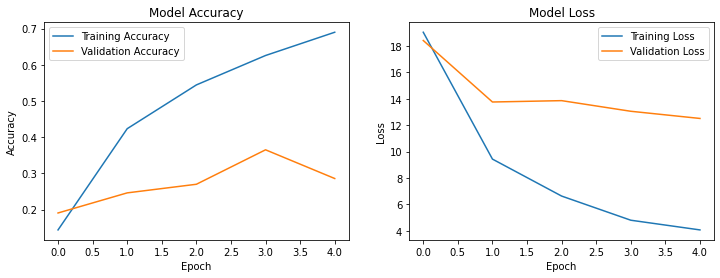

6/6 [==============================] - 49s 8s/step - loss: 6.8167 - accuracy: 0.6359
Test Loss: 6.8167
Test Accuracy: 63.59%


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Define paths
train_dir = 'dataset/train'  # Directory with subfolders like "aloperia areata", "beau_s lines", etc.
test_dir = 'dataset/test'    # Directory with matching subfolders

# Data augmentation and preprocessing for training with validation split
train_datagen = ImageDataGenerator(
    validation_split=0.2,  # 20% of train data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input  # VGG16-specific preprocessing
)

# Preprocessing for test data (no augmentation)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Create generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Save class labels (disease names from folder names)
class_labels = list(train_generator.class_indices.keys())  # e.g., ["aloperia areata", "beau_s lines", ...]
with open('class_labels.json', 'w') as f:
    json.dump(class_labels, f)
print("Class labels saved:", class_labels)

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
predictions = Dense(len(class_labels), activation='softmax')(x)  # Output layer matches number of classes

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define checkpoint to save the best model
checkpoint = ModelCheckpoint(
    'VGG16-nail-disease.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,  # Adjust epochs as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test set
model = tf.keras.models.load_model('VGG16-nail-disease.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")